Пунк №1 - Выбор начальных условий.

Датасет классификации - https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels/data


Обоснование выбора датасета классификации:

Ожирение -  глобальная проблема здравоохранения, затрагивающая более 650 миллионов человек по всему миру. Особенно актуальной её делает наш сидячий образ жизни.
Прогнозирование уровня ожирения помогает в ранней диагностике и профилактике болезней,вызываемых лишним весом, разработке персонализированных программ лечения, оптимизации ресурсов здравоохранения, улучшения качества предоставляемой медецинским работником помощи.

Датасет регресии - https://www.kaggle.com/datasets/aslanahmedov/walmart-sales-forecast/data



Обоснование выбора датасета регрессии:

Прогнозирование продаж - ключевая задача в  области  торговли, которая давно решается  с использованием алгоритмов ML, ибо это позволяет обеспечить оптимизации управления запасами, планирования персонала,управления цепочками поставок,финансового планирования филиала и всей торговой сети в целом.
 Walmart - крупнейший ритейлер, и анализ данных его продаж позволит выработать методы работы с типовыми для отрасли данными, которые могут быть в дальнейшем применены к другим ритейлерам.








ИСПОЛЬЗУЕМЫЕ МЕТРИКИ:

Для классификации (Obesity Levels):
Accuracy (Точность)

Обоснование: Базовая метрика для общей оценки модели

Формула: (TP + TN) / (TP + TN + FP + FN)

Применение: Общее качество классификации всех уровней ожирения

F1-Score

Обоснование: Важно при несбалансированных классах, объединяет precision и recall

Формула: 2 × (Precision × Recall) / (Precision + Recall)

Применение: Баланс между ложными срабатываниями и пропусками

Confusion Matrix (Матрица ошибок)

Обоснование: Визуализация ошибок классификации по всем классам

Применение: Анализ, какие уровни ожирения путает модель

Macro/Micro Precision и Recall

Macro: Обоснование - равное внимание к каждому классу, важно для медицинской диагностики

Micro: Обоснование - учет размера классов, общая эффективность

Применение: Комплексная оценка multi-class классификации

Для регрессии (Walmart Sales):
R² (Коэффициент детерминации)

Обоснование: Показывает долю дисперсии, объясненную моделью

Формула: 1 - (SS_res / SS_tot)

Применение: Общая объясняющая способность модели

MSE (Mean Squared Error)

Обоснование: Широко используется, чувствителен к выбросам

Формула: (1/n) × Σ(y_i - ŷ_i)²

Применение: Общая ошибка прогноза

MAE (Mean Absolute Error)

Обоснование: Легко интерпретировать, устойчив к выбросам

Формула: (1/n) × Σ|y_i - ŷ_i|

Применение: Средняя абсолютная ошибка в долларах

RMSE (Root Mean Squared Error)

Обоснование: Сохраняет единицы измерения, как MAE

Формула: √MSE

Применение: Стандартное отклонение ошибок

В рамках  notebookа я разделю пункты 2-4 исходного задания на работу с датасетом на комплексную работу с данными классификации и регрессии, дабы всё выглядело более целостно.

Классификация

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
import seaborn as sns


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
fatemehmehrparvar_obesity_levels_path = kagglehub.dataset_download('fatemehmehrparvar/obesity-levels')

print('Data source import complete.')


Using Colab cache for faster access to the 'obesity-levels' dataset.
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/obesity-levels/.nfs0000000062a95e0500000182
/kaggle/input/obesity-levels/ObesityDataSet_raw_and_data_sinthetic.csv


In [ ]:
df =  pd.read_csv('/kaggle/input/obesity-levels/ObesityDataSet_raw_and_data_sinthetic.csv')


#общаяя информация о таблице
df.info()
print(df.isnull().sum()) # смотрим на пропуски
df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
#Посмотрим на значения в object столбцах, ибо возможно null в виде строки лежит
for col in df.select_dtypes(include=['object']).columns:
    print(df[col].value_counts())
    print()

Gender
Male      1068
Female    1043
Name: count, dtype: int64

CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

FAVC
yes    1866
no      245
Name: count, dtype: int64

SCC
no     2015
yes      96
Name: count, dtype: int64

SMOKE
no     2067
yes      44
Name: count, dtype: int64

family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64

CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64



Как можно увидеть, тут нет null значений, только object столбцы - заменим их на onecode  enocoding,дабы модель могла сработать в baseline. Для таргета

In [ ]:
df.select_dtypes(include=['object']).columns
print(df.select_dtypes(include=['object']).columns)

Index(['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE',
       'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


In [ ]:
df = pd.get_dummies(df,columns=['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE',
       'family_history_with_overweight', 'CAEC', 'MTRANS'],drop_first=True)
df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Male,...,SCC_yes,SMOKE_yes,family_history_with_overweight_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,Normal_Weight,False,...,False,False,True,False,True,False,False,False,True,False
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,Normal_Weight,False,...,True,True,True,False,True,False,False,False,True,False
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,Normal_Weight,True,...,False,False,True,False,True,False,False,False,True,False
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,Overweight_Level_I,True,...,False,False,False,False,True,False,False,False,False,True
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,Overweight_Level_II,True,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,Obesity_Type_III,False,...,False,False,True,False,True,False,False,False,True,False
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,Obesity_Type_III,False,...,False,False,True,False,True,False,False,False,True,False
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,Obesity_Type_III,False,...,False,False,True,False,True,False,False,False,True,False
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,Obesity_Type_III,False,...,False,False,True,False,True,False,False,False,True,False


In [ ]:
df.info()#Информация о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 2111 non-null   float64
 1   Height                              2111 non-null   float64
 2   Weight                              2111 non-null   float64
 3   FCVC                                2111 non-null   float64
 4   NCP                                 2111 non-null   float64
 5   CH2O                                2111 non-null   float64
 6   FAF                                 2111 non-null   float64
 7   TUE                                 2111 non-null   float64
 8   NObeyesdad                          2111 non-null   object 
 9   Gender_Male                         2111 non-null   bool   
 10  CALC_Frequently                     2111 non-null   bool   
 11  CALC_Sometimes                      2111 no

In [ ]:
#Выделяем признаки и таргет
X = df.drop('NObeyesdad', axis=1)  # Все признаки кроме таргета
y = df['NObeyesdad']  # Таргетная переменная

In [ ]:
#Закодируем через Label encoding результирующую переменную,дабы принял алгоритм

In [ ]:
le = LabelEncoder()
y_transformed = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=42, stratify=y_transformed)#Hold-out с перемешиванием семплов

In [ ]:
print(f"Размер тренировочной выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")


Размер тренировочной выборки: (1688, 23)
Размер тестовой выборки: (423, 23)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [ ]:
knn_baseline = KNeighborsClassifier()#KNN без модификаций
knn_baseline.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn_baseline.predict(X_test)

# Метрики для KNN
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn, average='weighted')

print("KNN Baseline Results:")
print(f"Accuracy: {knn_accuracy:.4f}")
print(f"F1-Score: {knn_f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn, target_names=le.classes_))

KNN Baseline Results:
Accuracy: 0.8818
F1-Score: 0.8782

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.85      0.98      0.91        54
      Normal_Weight       0.89      0.59      0.71        58
     Obesity_Type_I       0.95      0.90      0.93        70
    Obesity_Type_II       0.91      0.97      0.94        60
   Obesity_Type_III       0.98      0.97      0.98        65
 Overweight_Level_I       0.78      0.88      0.83        58
Overweight_Level_II       0.80      0.88      0.84        58

           accuracy                           0.88       423
          macro avg       0.88      0.88      0.88       423
       weighted avg       0.89      0.88      0.88       423



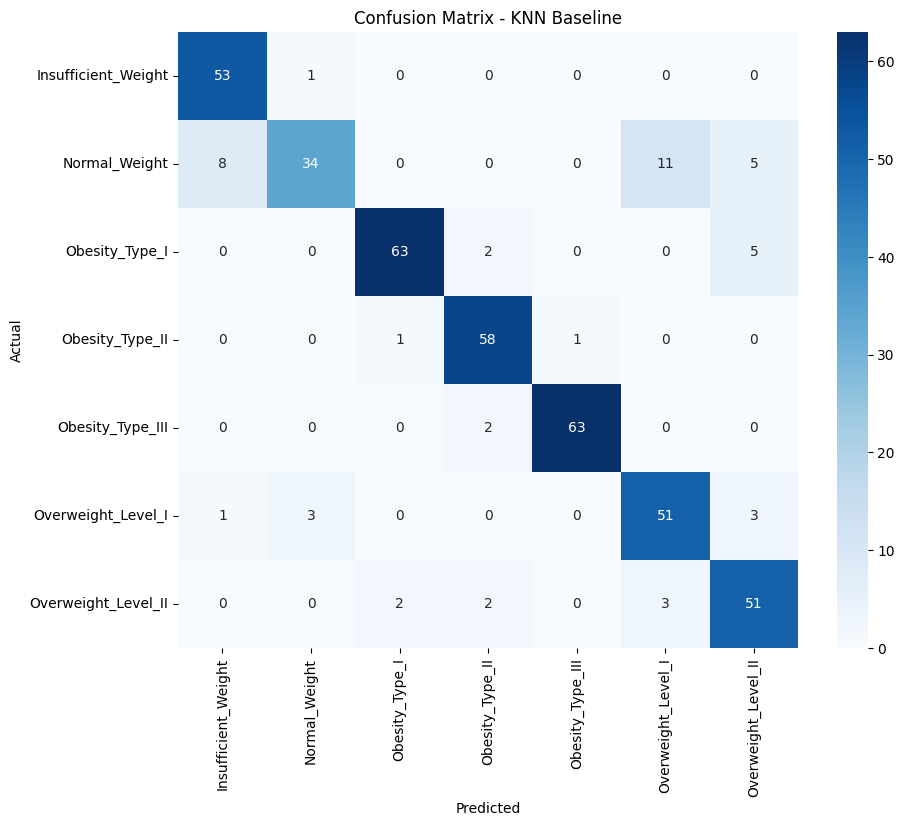

In [ ]:
# Матрица ошибок
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title('Confusion Matrix - KNN Baseline')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#Улучшим baseline
#Гипотезы:
#1 Добавление  scaler для нормализации числовых признаков улучшит производительность
#2 Можно варировать число n_neighbors для KNN как гиперпараметр, используя grid search.
#3 Можно сделать дополнительный признак в виде возрастных групп  и дополнительный признак в виде индекса массы тела(BMI)
#4 Можно избавиться от высоко корелирующих признаков(>0.9)

Проверим гипотезы

In [ ]:
# Гипотеза 1: Нормализация
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import cross_val_score

# Разные методы нормализации
scalers = {
    'NONE': None,
    'StandardScaler': StandardScaler(), #(x - mean) / sqrt(disp)
    'MinMaxScaler': MinMaxScaler(),  #(X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0)) *(max - min) + min
    'RobustScaler': RobustScaler() #(x-median)/(x25-x75)
}
print("\nГипотеза 1: Нормализация ")
for name, scaler in scalers.items():

    if name != 'NONE':
        X_scaled = scaler.fit_transform(X_train)
    else:
        X_scaled = X_train
    scores = cross_val_score(KNeighborsClassifier(n_neighbors=5), X_scaled, y_train, cv=5, scoring='accuracy')
    print(f"{name}: {scores.mean():.4f} ± {scores.std():.4f}")


Гипотеза 1: Нормализация 
NONE: 0.8555 ± 0.0057
StandardScaler: 0.7909 ± 0.0172
MinMaxScaler: 0.7666 ± 0.0268
RobustScaler: 0.8187 ± 0.0144


Гипотеза не подтвердилась : числовые данные все довольно близки меж собой и их нормолизация ведёт к утрате зависимости

In [ ]:
#2 Гипотеза 2: Подбор оптимального k
print("\nГипотеза 2: Подбор оптимального k")
param_grid = {'n_neighbors': range(3, 20, 2)} #Сетка параметров для Grid search.
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best k:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)




Гипотеза 2: Подбор оптимального k
Best k: {'n_neighbors': 3}
Best CV score: 0.8785489789826698


Гипотеза подтвердилась: по сравнению со стандартными k=5, accuracy возрасло на 0,02+.

In [ ]:
# Гипотеза 3: Feature Engineering
print("\nГипотеза 3: Feature Engineering")
def prepare_features(df):
    df_processed = df.copy()

    # BMI категории
    def bmi_category(bmi):
        if bmi < 18.5: return 0
        elif 18.5 <= bmi < 25: return 1
        elif 25 <= bmi < 30: return 2
        elif 30 <= bmi < 35: return 3
        elif 35 <= bmi < 40: return 4
        else: return 5

    # Возрастные группы
    def age_group(age):
        if age < 20: return 0
        elif 20 <= age < 30: return 1
        elif 30 <= age < 45: return 2
        elif 45 <= age < 60: return 3
        else: return 4

    # Создаем новые признаки
    df_processed['BMI_category'] =  df_processed['Weight'] / (df_processed['Height'] ** 2)
    df_processed['Age_group'] = df_processed['Age'].apply(age_group)


    return df_processed
names = ['NONE','new_params']
for name in names:
  if name !='NONE':
    X_train_enhanced = prepare_features(X_train)
  else :
    X_train_enhanced = X_train
  scores = cross_val_score(KNeighborsClassifier(n_neighbors=5), X_train_enhanced, y_train, cv=5, scoring='accuracy')
  print(f"{name}: {scores.mean():.4f} ± {scores.std():.4f}")


Гипотеза 3: Feature Engineering
NONE: 0.8555 ± 0.0057
new_params: 0.9425 ± 0.0129


Гипотеза подтвердилась: по сравнению со стандартными k=5, accuracy возрасло до 0,94


Гипотеза 4: 


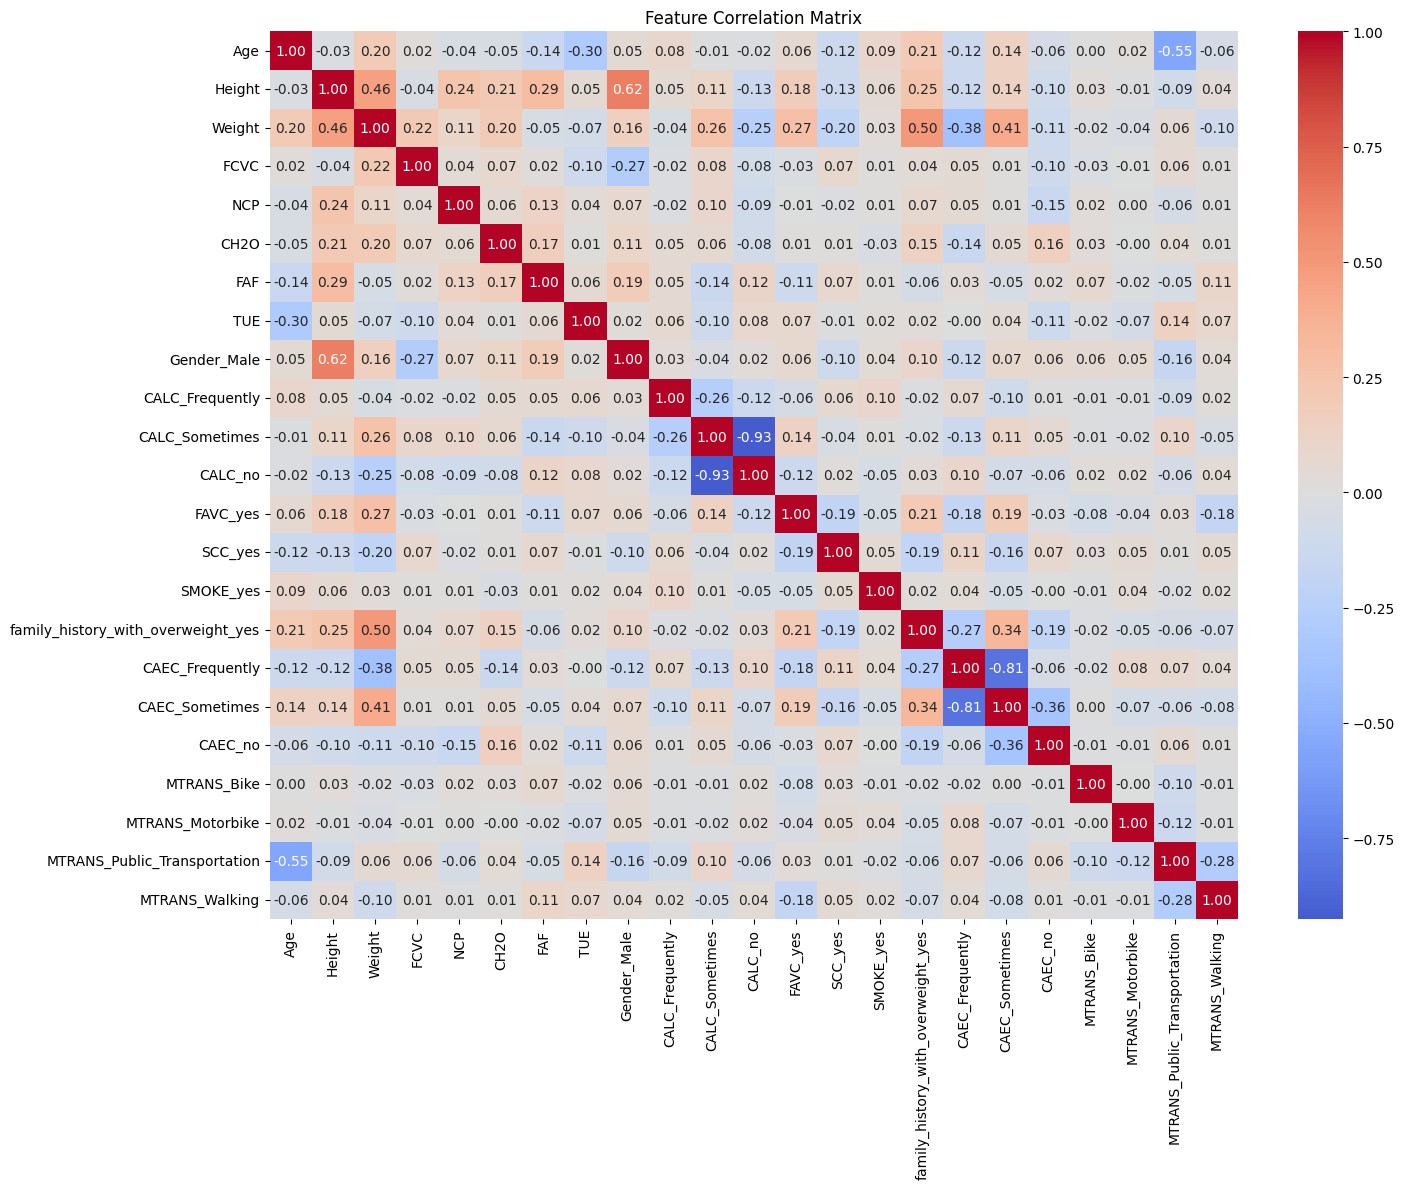

Features to drop due to high correlation: ['CALC_no', 'CAEC_Sometimes']


In [ ]:
print("\nГипотеза 4: ")

plt.figure(figsize=(15, 12))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Посмотрим на высоко коррелированные признаки (>0.80)
corr_matrix = df.corr(numeric_only=True).abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]
print(f"Features to drop due to high correlation: {to_drop}")

Визуализировав данные, мы убеждаемся, что меж собой корелируют лишь столбцы, полученные через onehot encoding с другими вариантами ответа, что говорит о редкости получения отрицательных вариантов в этой категории.
Гипотеза опровергнута: признаки не являются мультиколлинеарными

In [ ]:
#Улучшенный baseline
X = prepare_features(df.drop('NObeyesdad', axis=1))  # Все признаки кроме таргета
y = df['NObeyesdad']  # Таргетная переменная
le = LabelEncoder()
y_transformed = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=42, stratify=y_transformed)

In [ ]:
knn_baseline = KNeighborsClassifier(n_neighbors=3)#Обучение с лучшими параметрами
knn_baseline.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_knn = knn_baseline.predict(X_test)

# Метрики для KNN
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn, average='weighted')

print("KNN Baseline Results:")
print(f"Accuracy: {knn_accuracy:.4f}")
print(f"F1-Score: {knn_f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn, target_names=le.classes_))

KNN Baseline Results:
Accuracy: 0.9480
F1-Score: 0.9470

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.88      0.96      0.92        54
      Normal_Weight       0.92      0.76      0.83        58
     Obesity_Type_I       0.99      0.99      0.99        70
    Obesity_Type_II       1.00      0.98      0.99        60
   Obesity_Type_III       1.00      1.00      1.00        65
 Overweight_Level_I       0.87      0.95      0.91        58
Overweight_Level_II       0.97      0.98      0.97        58

           accuracy                           0.95       423
          macro avg       0.95      0.95      0.94       423
       weighted avg       0.95      0.95      0.95       423



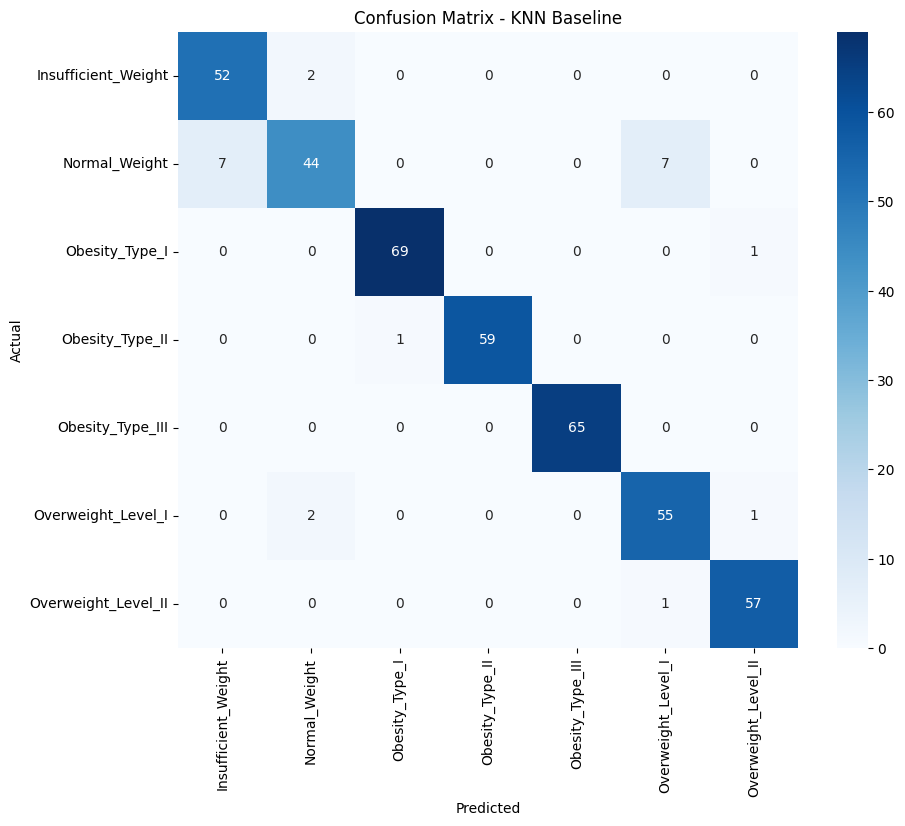

In [ ]:
# Матрица ошибок
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title('Confusion Matrix - KNN Baseline')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Вывод:
Улучшения, основанные на 2 и 3 гипотезах помогли значительно увеличить все метрики и максимально приблизиться к потолку точности для данного датасета.
В основном помогло введение обощающих признаков над числовыми значениями(индекса массы тела и возрастных групп, которые встречаются в работе врачей при вынесении диагнозов по ожирению), что дало сильный прирост в точности, что можно заметить при проверке гипотез, но и меньшее число соседей для учёта сделало модель более чуствительной к локальным паттернам данных.

In [ ]:
#4.Имплементация алгоритма машинного обучения
#Напишем её сразу для регрессии и классификаци
#Используем  манхетонское расстояние и brute вариант, без построения дерева
class MY_KNearestNeighbors:
  def __init__(self,n_neighbors=5, regression=False) -> None:
      self.n_neighbors=n_neighbors
      self.regression=regression

  def fit(self, X_train, y_train):
        self.X_train = X_train.astype(float)
        self.y_train = y_train


  def _manhattan_distance(self, x_test_i):
        # Преобразуем в float и обеспечиваем, что это numpy array
        x_test_i_float = np.array(x_test_i, dtype=float)
        # Манхэттенское расстояние: sum(|x_train - x_test|)
        absolute_diff = np.abs(self.X_train - x_test_i_float)
        return np.sum(absolute_diff, axis=1)

  def _make_prediction(self,x_test_i):
      distances = self._manhattan_distance(x_test_i); # brute вариант с манхэттенским расстоянием
      k_near = np.argsort(distances)[ : self.n_neighbors];
      near_targets = self.y_train[k_near];
      if  self.regression:
        result = np.mean(near_targets) # при регрессии выдает среднее
      else:
        result = np.bincount(near_targets).argmax() # при классификации берется наиболее встречающийся класс

      return result

  def predict(self,X_test):
      # Преобразуем весь X_test в float один раз
      X_test_float = np.array(X_test, dtype=float)
      return np.array([self._make_prediction(x) for x in X_test_float])

In [ ]:
#Cтандартный baseline
X = df.drop('NObeyesdad', axis=1)  # Все признаки кроме таргета
y = df['NObeyesdad']  # Таргетная переменная
le = LabelEncoder()
y_transformed = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=42, stratify=y_transformed)

In [ ]:
my_knn_baseline = MY_KNearestNeighbors()
my_knn_baseline.fit(X_train, y_train)

In [ ]:
y_pred_knn =my_knn_baseline.predict(X_test)

In [ ]:
# Метрики для KNN
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn, average='weighted')

print("KNN Baseline Results:")
print(f"Accuracy: {knn_accuracy:.4f}")
print(f"F1-Score: {knn_f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn, target_names=le.classes_))

KNN Baseline Results:
Accuracy: 0.9054
F1-Score: 0.9039

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.98      0.95        54
      Normal_Weight       0.89      0.69      0.78        58
     Obesity_Type_I       0.93      0.93      0.93        70
    Obesity_Type_II       0.95      0.97      0.96        60
   Obesity_Type_III       0.98      1.00      0.99        65
 Overweight_Level_I       0.78      0.90      0.83        58
Overweight_Level_II       0.88      0.86      0.87        58

           accuracy                           0.91       423
          macro avg       0.91      0.90      0.90       423
       weighted avg       0.91      0.91      0.90       423



In [ ]:
"""
Результаты исходного baseline:

KNN Baseline Results:
Accuracy: 0.8818
F1-Score: 0.8782

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.85      0.98      0.91        54
      Normal_Weight       0.89      0.59      0.71        58
     Obesity_Type_I       0.95      0.90      0.93        70
    Obesity_Type_II       0.91      0.97      0.94        60
   Obesity_Type_III       0.98      0.97      0.98        65
 Overweight_Level_I       0.78      0.88      0.83        58
Overweight_Level_II       0.80      0.88      0.84        58

           accuracy                           0.88       423
          macro avg       0.88      0.88      0.88       423
       weighted avg       0.89      0.88      0.88       423
"""

'\nРезультаты исходного baseline:\n\nKNN Baseline Results:\nAccuracy: 0.8818\nF1-Score: 0.8782\n\nClassification Report:\n                     precision    recall  f1-score   support\n\nInsufficient_Weight       0.85      0.98      0.91        54\n      Normal_Weight       0.89      0.59      0.71        58\n     Obesity_Type_I       0.95      0.90      0.93        70\n    Obesity_Type_II       0.91      0.97      0.94        60\n   Obesity_Type_III       0.98      0.97      0.98        65\n Overweight_Level_I       0.78      0.88      0.83        58\nOverweight_Level_II       0.80      0.88      0.84        58\n\n           accuracy                           0.88       423\n          macro avg       0.88      0.88      0.88       423\n       weighted avg       0.89      0.88      0.88       423\n'

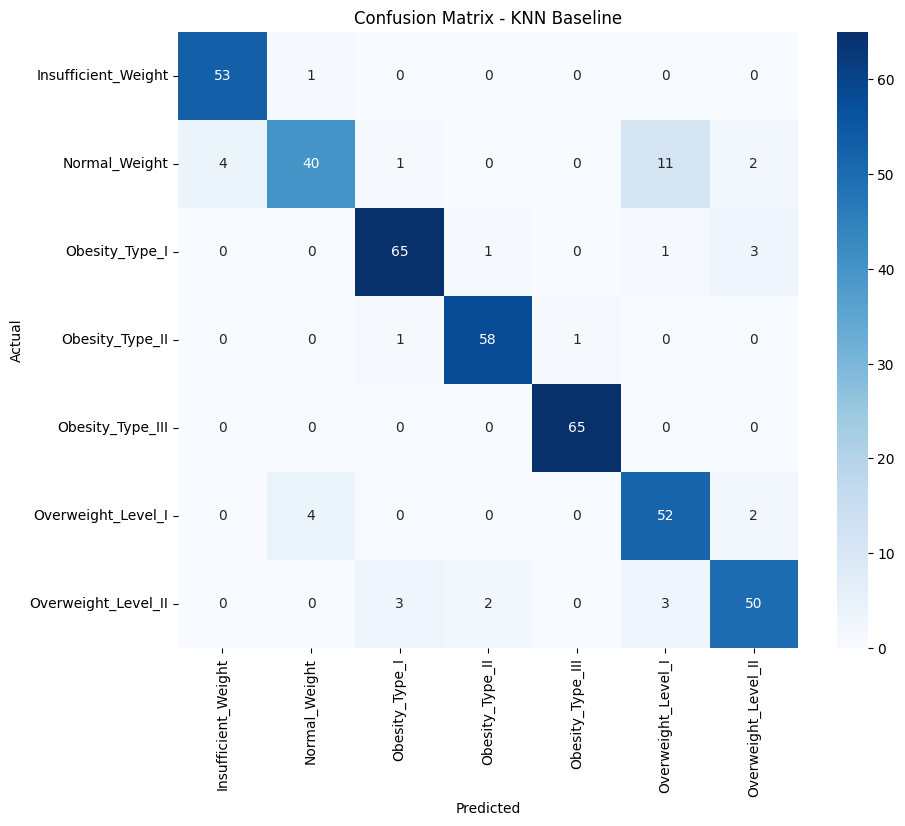

In [ ]:
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title('Confusion Matrix - KNN Baseline')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Вывод:
С использованием манхетенновоского расстояния мною была получена реализация, слегка превосходящая библиотечную по метрикам точности и F1-меры, что объясняется сильной разреженностью данных после применения One-Hot encoding(в чём можно убедиться, взглянув на матрицу кореляции признаков), что ведёт к увеличению расстояния между схожими объектами при использовании еквклидова расстояния.

In [ ]:
#Улучшенный baseline

In [ ]:
X = prepare_features(df.drop('NObeyesdad', axis=1))  # Все признаки кроме таргета
y = df['NObeyesdad']  # Таргетная переменная
le = LabelEncoder()
y_transformed = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=42, stratify=y_transformed)

In [ ]:
my_knn_baseline = MY_KNearestNeighbors(n_neighbors=3)
my_knn_baseline.fit(X_train, y_train)

In [ ]:
y_pred_knn =my_knn_baseline.predict(X_test)

In [ ]:
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn, average='weighted')

print("KNN Baseline Results:")
print(f"Accuracy: {knn_accuracy:.4f}")
print(f"F1-Score: {knn_f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn, target_names=le.classes_))

KNN Baseline Results:
Accuracy: 0.9693
F1-Score: 0.9687

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.95      1.00      0.97        54
      Normal_Weight       0.98      0.83      0.90        58
     Obesity_Type_I       1.00      1.00      1.00        70
    Obesity_Type_II       1.00      1.00      1.00        60
   Obesity_Type_III       1.00      1.00      1.00        65
 Overweight_Level_I       0.89      0.97      0.93        58
Overweight_Level_II       0.97      0.98      0.97        58

           accuracy                           0.97       423
          macro avg       0.97      0.97      0.97       423
       weighted avg       0.97      0.97      0.97       423



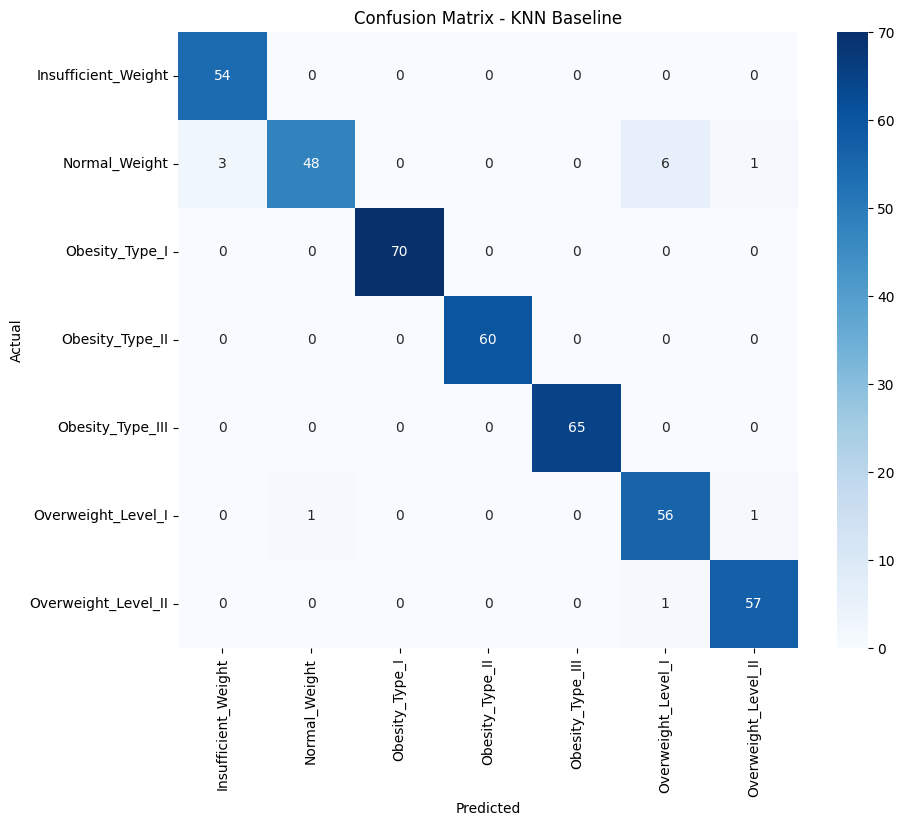

In [ ]:
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title('Confusion Matrix - KNN Baseline')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Выводы: Как мы видим, у улучшенного baseline также увеличилась точность и сохранился более высокий результат с манхэттенским расстоянием по сравнению с евклидовым. Это подтверждает, что выявленная закономерность не является артефактом исходного масштаба данных или их необработанного состояния, но отражает свойства используемых данных.

Регрессия

In [6]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
aslanahmedov_walmart_sales_forecast_path = kagglehub.dataset_download('aslanahmedov/walmart-sales-forecast')

print('Data source import complete.')#При запуске возможно будет необходимость выполнить дважды, он не сразу подтягивает с кагла датасет

Using Colab cache for faster access to the 'walmart-sales-forecast' dataset.
Data source import complete.


In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/walmart-sales-forecast/features.csv
/kaggle/input/walmart-sales-forecast/stores.csv
/kaggle/input/walmart-sales-forecast/train.csv
/kaggle/input/walmart-sales-forecast/test.csv


In [8]:

features = pd.read_csv("/kaggle/input/walmart-sales-forecast/features.csv")
stores = pd.read_csv("/kaggle/input/walmart-sales-forecast/stores.csv")
train = pd.read_csv("/kaggle/input/walmart-sales-forecast/train.csv")
test = pd.read_csv("/kaggle/input/walmart-sales-forecast/test.csv")



In [9]:
#общаяя информация о таблице фичей
features.info()
print(features.isnull().sum()) # смотрим на пропуски
print("Features Dataset shape:", features.shape)
features.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemploy

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
#общаяя информация о таблице train
stores.info()
print(stores.isnull().sum()) # смотрим на пропуски
stores.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
Store    0
Type     0
Size     0
dtype: int64


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
#общаяя информация о таблице train
train.info()
print(train.isnull().sum()) # смотрим на пропуски
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
#общаяя информация о таблице test
test.info()
print(test.isnull().sum()) # смотрим на пропуски
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB
Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [10]:
#Все столбцы с датами переведём из object к  более удобному datetime
for df in [features, train, test]:
    df["Date"] = pd.to_datetime(df["Date"])

In [ ]:
#Cоеденим таблицы, дабы получить полноценные датасеты для обучения и тестировния(раз их разделили создатели датасета заранее) при помощи совпадающих столбцов(Магазина в списке магазинов и 	Store,	Date и IsHoliday у таблицы фич)

In [11]:
train = train.merge(features, on=["Store", "Date", "IsHoliday"], how="left")#sql left join
train = train.merge(stores, on="Store", how="left")#sql left join

test = test.merge(features, on=["Store", "Date", "IsHoliday"], how="left") #sql left join
test = test.merge(stores, on="Store", how="left")#sql left join

In [12]:
train_combined = train.copy()#Скопируем таблицы
test_combined = test.copy()


In [13]:
# Заполняем пропущенные значения 0(для того,чтобы минимально запустилось и предположительно, что 0 отвечает отсутствию акций в системе)
train_combined.fillna(0, inplace=True)
test_combined.fillna(0, inplace=True)

In [14]:
train_combined = pd.get_dummies(train_combined, columns=['Type'], prefix='Type')#One-hot encoding для категориального признака
test_combined = pd.get_dummies(test_combined, columns=['Type'], prefix='Type')


In [15]:
train_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Size          421570 non-null  int64         
 15  Type_A        421

In [16]:
#Бьем date на временные признаки для характеристики даты и отказа от строковой записи
for df in [train_combined, test_combined]:
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Week'] = df['Date'].dt.isocalendar().week
    df['DayOfWeek'] = df['Date'].dt.dayofweek


In [17]:
feature_columns = [
    'Store', 'Dept', 'Size', 'IsHoliday', 'Temperature', 'Fuel_Price',
    'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3',
    'MarkDown4', 'MarkDown5', 'Year', 'Month', 'Week', 'DayOfWeek'
] + [col for col in train_combined.columns if col.startswith('Type_')] #все фичи, без DATe+ target

In [18]:
available_features = [col for col in feature_columns if col in train_combined.columns] #Запишем их отдельно в массив
print(f"Used features: {available_features}")

Used features: ['Store', 'Dept', 'Size', 'IsHoliday', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Year', 'Month', 'Week', 'DayOfWeek', 'Type_A', 'Type_B', 'Type_C']


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_reg = train_combined[available_features] #Будем учить на train, на test не прилагается итоговой переменной
y_reg = train_combined['Weekly_Sales']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

print(f"Размер тренировочной выборки: {X_train_reg.shape}")
print(f"Размер тестовой выборки: {X_test_reg.shape}")



Размер тренировочной выборки: (337256, 20)
Размер тестовой выборки: (84314, 20)


In [21]:
#Обучаем KNN регрессию из sklearn
from sklearn.neighbors import KNeighborsRegressor

# Бейзлайн KNN регрессия
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train_reg, y_train_reg)


KNeighborsRegressor()

In [22]:

y_pred_reg = knn_regressor.predict(X_test_reg)

#Оценка качества модели регрессии
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Рассчитываем метрики
r2 = r2_score(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)

rmse = np.sqrt(mse)

print("\n" + "="*50)
print("KNN РЕГРЕССИЯ - РЕЗУЛЬТАТЫ БЕЙЗЛАЙНА")
print("="*50)
print(f"R² (Коэффициент детерминации): {r2:.4f}")
print(f"MSE (Средняя квадратичная ошибка): {mse:.4f}")
print(f"MAE (Средняя абсолютная ошибка): {mae:.4f}")

print(f"RMSE (Среднеквадратичная ошибка): {rmse:.4f}")



KNN РЕГРЕССИЯ - РЕЗУЛЬТАТЫ БЕЙЗЛАЙНА
R² (Коэффициент детерминации): 0.3839
MSE (Средняя квадратичная ошибка): 321268022.9287
MAE (Средняя абсолютная ошибка): 10913.4680
RMSE (Среднеквадратичная ошибка): 17923.9511


In [ ]:
#Улучшим baseline
#Гипотезы:
#1 Можно заменять данные на о маркировке на средние и/или удалить строки или стобцы с ними и сравнить результаты
#2 Добавление  scaler для нормализации числовых признаков может улучшить  метрики
#2 Можно варировать число n_neighbors для KNN как гиперпараметр, используя grid search для нахождения оптимальных параметров.
#3 Обработать выбросы в датасете, что позволит более точно выделить зависимость
#4 Можно добавить искусственнные доменные признаки, фичи, отвечающие за сезонность для улучшения обобщающей способности модели

In [23]:
print("\nГипотеза 1: Обработка пропусков MarkDown")


Гипотеза 1: Обработка пропусков MarkDown


In [24]:

train_combined = train.copy()
test_combined = test.copy()

# Удаляем столбцы с MarkDown вместо удаления строк
columns_to_drop = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
train_combined = train_combined.drop(columns=columns_to_drop)
test_combined = test_combined.drop(columns=columns_to_drop)

train_combined = pd.get_dummies(train_combined, columns=['Type'], prefix='Type')
test_combined = pd.get_dummies(test_combined, columns=['Type'], prefix='Type')

train_combined.info()

# Бьем date на временные признаки
for df in [train_combined, test_combined]:
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Week'] = df['Date'].dt.isocalendar().week
    df['DayOfWeek'] = df['Date'].dt.dayofweek

feature_columns = [
    'Store', 'Dept', 'Size', 'IsHoliday', 'Temperature', 'Fuel_Price',
    'CPI', 'Unemployment', 'Year', 'Month', 'Week', 'DayOfWeek'
] + [col for col in train_combined.columns if col.startswith('Type_')]

available_features = [col for col in feature_columns if col in train_combined.columns]
print(f"Used features: {available_features}")

from sklearn.model_selection import train_test_split

X_reg = train_combined[available_features]
y_reg = train_combined['Weekly_Sales']

# Проверяем на наличие NaN после всех преобразований
print(f"\nПропуски в X_reg: {X_reg.isna().sum().sum()}")
print(f"Пропуски в y_reg: {y_reg.isna().sum()}")

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

print(f"Размер тренировочной выборки: {X_train_reg.shape}")
print(f"Размер тестовой выборки: {X_test_reg.shape}")

# Обучаем KNN регрессию из sklearn
from sklearn.neighbors import KNeighborsRegressor

# Бейзлайн KNN регрессия
knn_regressor = KNeighborsRegressor(n_neighbors=15)
knn_regressor.fit(X_train_reg, y_train_reg)

y_pred_reg = knn_regressor.predict(X_test_reg)

# Оценка качества модели регрессии
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Рассчитываем метрики
r2 = r2_score(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mape = mean_absolute_percentage_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)

print("\n" + "="*50)
print("KNN РЕГРЕССИЯ - РЕЗУЛЬТАТЫ БЕЙЗЛАЙНА")
print("="*50)
print(f"R² (Коэффициент детерминации): {r2:.4f}")
print(f"MSE (Средняя квадратичная ошибка): {mse:.4f}")
print(f"MAE (Средняя абсолютная ошибка): {mae:.4f}")
print(f"MAPE (Средняя абсолютная процентная ошибка): {mape:.4f}")
print(f"RMSE (Среднеквадратичная ошибка): {rmse:.4f}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   CPI           421570 non-null  float64       
 8   Unemployment  421570 non-null  float64       
 9   Size          421570 non-null  int64         
 10  Type_A        421570 non-null  bool          
 11  Type_B        421570 non-null  bool          
 12  Type_C        421570 non-null  bool          
dtypes: bool(4), datetime64[ns](1), float64(5), int64(3)
memory usage: 30.6 MB
Used features: ['Store', 'Dept', 'Size', 'IsH

In [25]:
train_combined = train.copy()
test_combined = test.copy()

# Заполняем пропущенные значения в MarkDown столбцах средним
markdown_columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

for column in markdown_columns:
    # Вычисляем среднее значение по тренировочным данным
    mean_value = train_combined[column].mean()
    # Заполняем пропуски в train и test
    train_combined[column] = train_combined[column].fillna(mean_value)
    test_combined[column] = test_combined[column].fillna(mean_value)

train_combined = pd.get_dummies(train_combined, columns=['Type'], prefix='Type')
test_combined = pd.get_dummies(test_combined, columns=['Type'], prefix='Type')

train_combined.info()

# Бьем date на временные признаки
for df in [train_combined, test_combined]:
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Week'] = df['Date'].dt.isocalendar().week
    df['DayOfWeek'] = df['Date'].dt.dayofweek

feature_columns = [
    'Store', 'Dept', 'Size', 'IsHoliday', 'Temperature', 'Fuel_Price',
    'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3',
    'MarkDown4', 'MarkDown5', 'Year', 'Month', 'Week', 'DayOfWeek'
] + [col for col in train_combined.columns if col.startswith('Type_')]

available_features = [col for col in feature_columns if col in train_combined.columns]
print(f"Used features: {available_features}")

from sklearn.model_selection import train_test_split

X_reg = train_combined[available_features]
y_reg = train_combined['Weekly_Sales']

# Проверяем на наличие NaN после всех преобразований
print(f"\nПропуски в X_reg: {X_reg.isna().sum().sum()}")
print(f"Пропуски в y_reg: {y_reg.isna().sum()}")

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

print(f"Размер тренировочной выборки: {X_train_reg.shape}")
print(f"Размер тестовой выборки: {X_test_reg.shape}")

# Обучаем KNN регрессию из sklearn
from sklearn.neighbors import KNeighborsRegressor

# Бейзлайн KNN регрессия
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train_reg, y_train_reg)

y_pred_reg = knn_regressor.predict(X_test_reg)

# Оценка качества модели регрессии
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Рассчитываем метрики
r2 = r2_score(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mape = mean_absolute_percentage_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)

print("\n" + "="*50)
print("KNN РЕГРЕССИЯ - РЕЗУЛЬТАТЫ БЕЙЗЛАЙНА")
print("="*50)
print(f"R² (Коэффициент детерминации): {r2:.4f}")
print(f"MSE (Средняя квадратичная ошибка): {mse:.4f}")
print(f"MAE (Средняя абсолютная ошибка): {mae:.4f}")

print(f"RMSE (Среднеквадратичная ошибка): {rmse:.4f}")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Size          421570 non-null  int64         
 15  Type_A        421

Гипотеза подтвердилась: удаление столбцов привело к улучшению baseline по всем метриками (P.s. для дальнейших гипотез будем использовать её, ибо фич меньше и knn быстрее работает)

In [26]:
def evaluate_model(y_true, y_pred, model_name):#Для вывода будем использовать данную функцию.
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    rmse = np.sqrt(mse)

    print(f"\n{model_name}")
    print("="*50)
    print(f"R²: {r2:.4f}")
    print(f"MSE: {mse:.2f}")
    print(f"MAE: {mae:.2f}")

    print(f"RMSE: {rmse:.2f}")

    return r2, mse, mae, mape, rmse

In [27]:
print("Гипотеза 2: Добавление StandardScaler")
from sklearn.preprocessing import StandardScaler

# Используем лучший вариант без MarkDown
train_combined = train.copy()
test_combined = test.copy()

# Удаляем MarkDown столбцы (лучший результат)
train_combined = train_combined.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])
test_combined = test_combined.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])

train_combined = pd.get_dummies(train_combined, columns=['Type'], prefix='Type')
test_combined = pd.get_dummies(test_combined, columns=['Type'], prefix='Type')

# Временные признаки
for df in [train_combined, test_combined]:
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Week'] = df['Date'].dt.isocalendar().week
    df['DayOfWeek'] = df['Date'].dt.dayofweek

feature_columns = [
    'Store', 'Dept', 'Size', 'IsHoliday', 'Temperature', 'Fuel_Price',
    'CPI', 'Unemployment', 'Year', 'Month', 'Week', 'DayOfWeek'
] + [col for col in train_combined.columns if col.startswith('Type_')]

available_features = [col for col in feature_columns if col in train_combined.columns]

X_reg = train_combined[available_features]
y_reg = train_combined['Weekly_Sales']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Применяем StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reg)
X_test_scaled = scaler.transform(X_test_reg)

knn_scaler = KNeighborsRegressor(n_neighbors=5)
knn_scaler.fit(X_train_scaled, y_train_reg)
y_pred_scaler = knn_scaler.predict(X_test_scaled)

r2_scaler, mse_scaler, mae_scaler, mape_scaler, rmse_scaler = evaluate_model(
    y_test_reg, y_pred_scaler, "KNN СО STANDARDSCALER"
)

Гипотеза 2: Добавление StandardScaler

KNN СО STANDARDSCALER
R²: 0.3057
MSE: 362062717.07
MAE: 11824.84
RMSE: 19027.95


In [28]:
print("Гипотеза 2: Добавление MinMaxScaler")
from sklearn.preprocessing import StandardScaler

# Используем лучший вариант без MarkDown
train_combined = train.copy()
test_combined = test.copy()

# Удаляем MarkDown столбцы (лучший результат)
train_combined = train_combined.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])
test_combined = test_combined.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])

train_combined = pd.get_dummies(train_combined, columns=['Type'], prefix='Type')
test_combined = pd.get_dummies(test_combined, columns=['Type'], prefix='Type')

# Временные признаки
for df in [train_combined, test_combined]:
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Week'] = df['Date'].dt.isocalendar().week
    df['DayOfWeek'] = df['Date'].dt.dayofweek

feature_columns = [
    'Store', 'Dept', 'Size', 'IsHoliday', 'Temperature', 'Fuel_Price',
    'CPI', 'Unemployment', 'Year', 'Month', 'Week', 'DayOfWeek'
] + [col for col in train_combined.columns if col.startswith('Type_')]

available_features = [col for col in feature_columns if col in train_combined.columns]

X_reg = train_combined[available_features]
y_reg = train_combined['Weekly_Sales']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Применяем MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_reg)
X_test_scaled = scaler.transform(X_test_reg)

knn_scaler = KNeighborsRegressor(n_neighbors=5)
knn_scaler.fit(X_train_scaled, y_train_reg)
y_pred_scaler = knn_scaler.predict(X_test_scaled)

r2_scaler, mse_scaler, mae_scaler, mape_scaler, rmse_scaler = evaluate_model(
    y_test_reg, y_pred_scaler, "KNN СО MinMaxScaler"
)

Гипотеза 2: Добавление MinMaxScaler

KNN СО MinMaxScaler
R²: 0.3498
MSE: 339070703.04
MAE: 11377.07
RMSE: 18413.87


In [ ]:
print("Гипотеза 2: Добавление MinMaxSclaer")
from sklearn.preprocessing import StandardScaler

# Используем лучший вариант без MarkDown
train_combined = train.copy()
test_combined = test.copy()

# Удаляем MarkDown столбцы (лучший результат)
train_combined = train_combined.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])
test_combined = test_combined.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])

train_combined = pd.get_dummies(train_combined, columns=['Type'], prefix='Type')
test_combined = pd.get_dummies(test_combined, columns=['Type'], prefix='Type')

# Временные признаки
for df in [train_combined, test_combined]:
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Week'] = df['Date'].dt.isocalendar().week
    df['DayOfWeek'] = df['Date'].dt.dayofweek

feature_columns = [
    'Store', 'Dept', 'Size', 'IsHoliday', 'Temperature', 'Fuel_Price',
    'CPI', 'Unemployment', 'Year', 'Month', 'Week', 'DayOfWeek'
] + [col for col in train_combined.columns if col.startswith('Type_')]

available_features = [col for col in feature_columns if col in train_combined.columns]

X_reg = train_combined[available_features]
y_reg = train_combined['Weekly_Sales']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Применяем MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_reg)
X_test_scaled = scaler.transform(X_test_reg)

knn_scaler = KNeighborsRegressor(n_neighbors=5)
knn_scaler.fit(X_train_scaled, y_train_reg)
y_pred_scaler = knn_scaler.predict(X_test_scaled)

r2_scaler, mse_scaler, mae_scaler, mape_scaler, rmse_scaler = evaluate_model(
    y_test_reg, y_pred_scaler, "KNN СО MinMaxScaler"
)

Гипотеза 2: Добавление StandardScaler

KNN СО MinMaxScaler
R²: 0.3498
MSE: 339070703.04
MAE: 11377.07
MAPE: 10216228856961814.0000
RMSE: 18413.87


In [29]:

print("Гипотеза 2: Добавление RobustScale")
from sklearn.preprocessing import RobustScaler

# Используем лучший вариант без MarkDown
train_combined = train.copy()
test_combined = test.copy()

# Удаляем MarkDown столбцы (лучший результат)
train_combined = train_combined.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])
test_combined = test_combined.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])

train_combined = pd.get_dummies(train_combined, columns=['Type'], prefix='Type')
test_combined = pd.get_dummies(test_combined, columns=['Type'], prefix='Type')

# Временные признаки
for df in [train_combined, test_combined]:
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Week'] = df['Date'].dt.isocalendar().week
    df['DayOfWeek'] = df['Date'].dt.dayofweek

feature_columns = [
    'Store', 'Dept', 'Size', 'IsHoliday', 'Temperature', 'Fuel_Price',
    'CPI', 'Unemployment', 'Year', 'Month', 'Week', 'DayOfWeek'
] + [col for col in train_combined.columns if col.startswith('Type_')]

available_features = [col for col in feature_columns if col in train_combined.columns]

X_reg = train_combined[available_features]
y_reg = train_combined['Weekly_Sales']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Применяем RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_reg)
X_test_scaled = scaler.transform(X_test_reg)

knn_scaler = KNeighborsRegressor(n_neighbors=5)
knn_scaler.fit(X_train_scaled, y_train_reg)
y_pred_scaler = knn_scaler.predict(X_test_scaled)

r2_scaler, mse_scaler, mae_scaler, mape_scaler, rmse_scaler = evaluate_model(
    y_test_reg, y_pred_scaler, "KNN СО RobustScaler"
)

Гипотеза 2: Добавление RobustScale

KNN СО RobustScaler
R²: 0.2955
MSE: 367376752.99
MAE: 11946.97
RMSE: 19167.07


Гипотеза не подтвердилась: scaler делает хуже

In [30]:
def rmse_scorer(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [31]:
print("\nГипотеза 3: Подбор гиперпараметров GridSearch по RMSE")
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np

# Создаем кастомную метрику RMSE для scoring


# Регистрируем scorer
rmse_score = make_scorer(rmse_scorer, greater_is_better=False)

param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15,20,30],

}

knn_grid = KNeighborsRegressor()
grid_search = GridSearchCV(knn_grid, param_grid, cv=3, scoring=rmse_score, n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train_reg)

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучший RMSE на кросс-валидации: {-grid_search.best_score_:.4f}")

y_pred_grid = grid_search.predict(X_test_scaled)
r2_grid, mse_grid, mae_grid, mape_grid, rmse_grid = evaluate_model(
    y_test_reg, y_pred_grid, "KNN С GRIDSEARCH (RMSE)"
)


Гипотеза 3: Подбор гиперпараметров GridSearch по RMSE
Fitting 3 folds for each of 7 candidates, totalling 21 fits
Лучшие параметры: {'n_neighbors': 15}
Лучший RMSE на кросс-валидации: 19086.8246

KNN С GRIDSEARCH (RMSE)
R²: 0.3185
MSE: 355362378.96
MAE: 11612.06
RMSE: 18851.06


Гипотеза подтвердилась(мы  нашли лучший гиперпараметр)

Гипотеза 4: Анализ и обработка выбросов


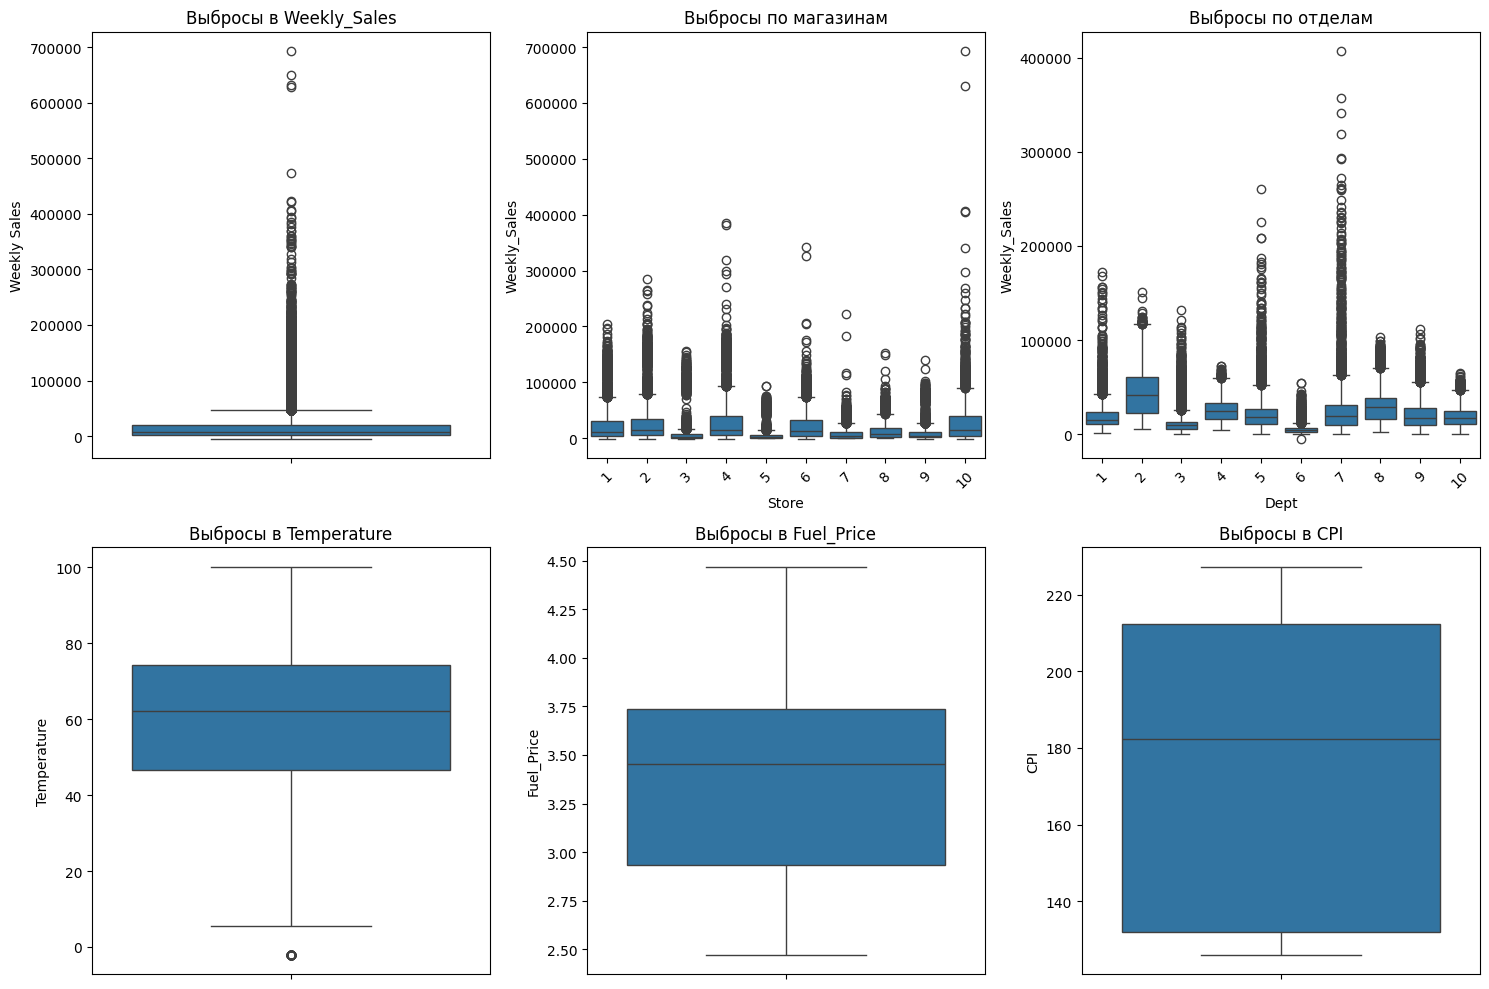


Количественный анализ выбросов (метод IQR):
Weekly_Sales   :  35521 выбросов ( 8.43%) [(-25109.65, 47395.16)]
Temperature    :     69 выбросов ( 0.02%) [(   5.28,  115.68)]
Fuel_Price     :      0 выбросов ( 0.00%) [(   1.73,    4.95)]
CPI            :      0 выбросов ( 0.00%) [(  11.43,  333.01)]
Unemployment   :  32114 выбросов ( 7.62%) [(   4.37,   11.09)]
Size           :      0 выбросов ( 0.00%) [(-69662.50, 365805.50)]

Гипотеза 9: Обработка выбросов в Weekly_Sales

Сравнение методов обработки выбросов:
Исходный размер данных: 421570
После winsorization: 421570
После удаления выбросов: 386049


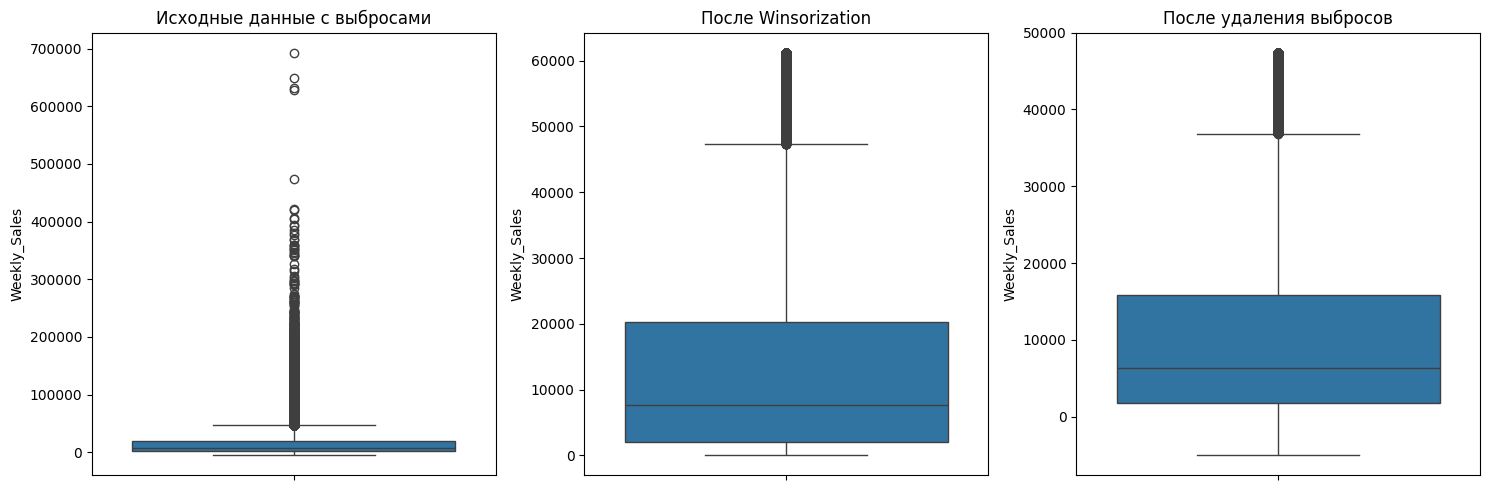


Сравнение методов обработки выбросов:
RMSE с исходными данными: 15589.1014
RMSE с winsorization: 11229.4970
RMSE с удалением выбросов: 8116.5725

 Лучший метод обработки выбросов: Удаление выбросов (RMSE = 8116.5725)

Анализ выбросов по праздничным дням:
Медиана продаж в праздники: 7947.74
Медиана продаж в обычные дни: 7589.95
Отношение: 1.05x


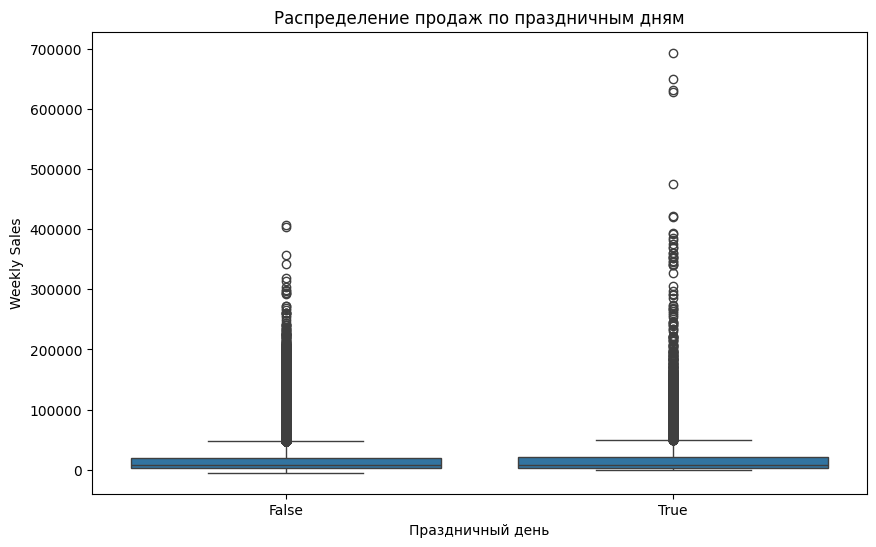


Экстремальные выбросы (>99% перцентиль): 4216 записей
Статистика по экстремальным выбросам:
  Магазины: [ 1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 31 32 34 35 39 40 41 42 43 45]
  Отделы: [ 7 38 72 90 92 95  5 82  2 23  1  3 14 18 40 46 55 16 91  9 11]
  Праздники: 9.39%


In [32]:
# Оценка выбросов через boxplot
import matplotlib.pyplot as plt
import seaborn as sns

print("Гипотеза 4: Анализ и обработка выбросов")

# Анализ выбросов в целевой переменной
plt.figure(figsize=(15, 10))

# 1. Boxplot Weekly_Sales
plt.subplot(2, 3, 1)
sns.boxplot(y=train['Weekly_Sales'])
plt.title('Выбросы в Weekly_Sales')
plt.ylabel('Weekly Sales')

# 2. Boxplot по магазинам
plt.subplot(2, 3, 2)
sample_stores = train['Store'].unique()[:10]  # первые 10 магазинов для наглядности
sns.boxplot(data=train[train['Store'].isin(sample_stores)], x='Store', y='Weekly_Sales')
plt.title('Выбросы по магазинам')
plt.xticks(rotation=45)

# 3. Boxplot по отделам
plt.subplot(2, 3, 3)
sample_depts = train['Dept'].unique()[:10]  # первые 10 отделов
sns.boxplot(data=train[train['Dept'].isin(sample_depts)], x='Dept', y='Weekly_Sales')
plt.title('Выбросы по отделам')
plt.xticks(rotation=45)

# 4. Boxplot числовых признаков
plt.subplot(2, 3, 4)
sns.boxplot(y=train['Temperature'])
plt.title('Выбросы в Temperature')

plt.subplot(2, 3, 5)
sns.boxplot(y=train['Fuel_Price'])
plt.title('Выбросы в Fuel_Price')

plt.subplot(2, 3, 6)
sns.boxplot(y=train['CPI'])
plt.title('Выбросы в CPI')

plt.tight_layout()
plt.show()

# Количественный анализ выбросов
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

print("\nКоличественный анализ выбросов (метод IQR):")
numeric_columns = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']

for col in numeric_columns:
    if col in train.columns:
        outliers_count, lower, upper = detect_outliers_iqr(train, col)
        percentage = (outliers_count / len(train)) * 100
        print(f"{col:<15}: {outliers_count:>6} выбросов ({percentage:5.2f}%) [({lower:7.2f}, {upper:7.2f})]")

# Гипотеза: Обработка выбросов в целевой переменной
print("\nГипотеза 9: Обработка выбросов в Weekly_Sales")

# Создаем копии для экспериментов с выбросами
train_no_outliers = train.copy()
test_no_outliers = test.copy()

# Метод 1: Winsorization (ограничение выбросов)
def winsorize_series(series, limits=(0.05, 0.05)):
    """Ограничивает выбросы перцентилями"""
    lower_limit = series.quantile(limits[0])
    upper_limit = series.quantile(1 - limits[1])
    return np.clip(series, lower_limit, upper_limit)

# Метод 2: Удаление выбросов
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

print("\nСравнение методов обработки выбросов:")

# Метод 1: Winsorization
train_winsorized = train.copy()
train_winsorized['Weekly_Sales'] = winsorize_series(train_winsorized['Weekly_Sales'])

# Метод 2: Удаление выбросов
train_cleaned = remove_outliers_iqr(train, 'Weekly_Sales')

print(f"Исходный размер данных: {len(train)}")
print(f"После winsorization: {len(train_winsorized)}")
print(f"После удаления выбросов: {len(train_cleaned)}")

# Визуализация результатов обработки выбросов
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=train['Weekly_Sales'])
plt.title('Исходные данные с выбросами')

plt.subplot(1, 3, 2)
sns.boxplot(y=train_winsorized['Weekly_Sales'])
plt.title('После Winsorization')

plt.subplot(1, 3, 3)
sns.boxplot(y=train_cleaned['Weekly_Sales'])
plt.title('После удаления выбросов')

plt.tight_layout()
plt.show()

# Тестируем оба метода на модели
def test_outlier_method(train_data, method_name):
    """Тестирует метод обработки выбросов"""
    temp_train = train_data.copy()

    # Применяем лучшие практики из предыдущих гипотез
    temp_train = temp_train.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])
    temp_train = pd.get_dummies(temp_train, columns=['Type'], prefix='Type')

    # Базовые временные признаки
    temp_train['Year'] = temp_train['Date'].dt.year
    temp_train['Month'] = temp_train['Date'].dt.month
    temp_train['DayOfWeek'] = temp_train['Date'].dt.dayofweek

    feature_columns = [
        'Store', 'Dept', 'Size', 'IsHoliday', 'Temperature', 'Fuel_Price',
        'CPI', 'Unemployment', 'Year', 'Month', 'DayOfWeek'
    ] + [col for col in temp_train.columns if col.startswith('Type_')]

    available_features = [col for col in feature_columns if col in temp_train.columns]

    X = temp_train[available_features]
    y = temp_train['Weekly_Sales']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    r2 = rmse_scorer(y_test, y_pred)
    return r2

# Тестируем разные методы обработки выбросов
print("\nСравнение методов обработки выбросов:") #P.s. писал под R^2, но из-за удаления выбросов он стал неустойчивым, так что я его заменил на RMSE
r2_original = test_outlier_method(train, "Исходные данные")
r2_winsorized = test_outlier_method(train_winsorized, "Winsorization")
r2_cleaned = test_outlier_method(train_cleaned, "Удаление выбросов")

print(f"RMSE с исходными данными: {r2_original:.4f}")
print(f"RMSE с winsorization: {r2_winsorized:.4f}")
print(f"RMSE с удалением выбросов: {r2_cleaned:.4f}")

# Определяем лучший метод
methods = {
    "Исходные данные": r2_original,
    "Winsorization": r2_winsorized,
    "Удаление выбросов": r2_cleaned
}

best_outlier_method = min(methods, key=methods.get)
print(f"\n Лучший метод обработки выбросов: {best_outlier_method} (RMSE = {methods[best_outlier_method]:.4f})")

# Дополнительный анализ: выбросы по праздничным дням
print("\nАнализ выбросов по праздничным дням:")
holiday_sales = train[train['IsHoliday'] == True]['Weekly_Sales']
non_holiday_sales = train[train['IsHoliday'] == False]['Weekly_Sales']

print(f"Медиана продаж в праздники: {holiday_sales.median():.2f}")
print(f"Медиана продаж в обычные дни: {non_holiday_sales.median():.2f}")
print(f"Отношение: {holiday_sales.median() / non_holiday_sales.median():.2f}x")

# Визуализация распределения по праздникам
plt.figure(figsize=(10, 6))
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=train)
plt.title('Распределение продаж по праздничным дням')
plt.xlabel('Праздничный день')
plt.ylabel('Weekly Sales')
plt.show()

# Анализ экстремальных выбросов
extreme_outliers = train[train['Weekly_Sales'] > train['Weekly_Sales'].quantile(0.99)]
print(f"\nЭкстремальные выбросы (>99% перцентиль): {len(extreme_outliers)} записей")
print("Статистика по экстремальным выбросам:")
print(f"  Магазины: {extreme_outliers['Store'].unique()}")
print(f"  Отделы: {extreme_outliers['Dept'].unique()}")
print(f"  Праздники: {extreme_outliers['IsHoliday'].mean():.2%}")

Гипотеза подтвердилась - удаление выбросов(в пределах Межквартильный размаха) значительно улучшило метрику RMSE модели и привело к качественному улучшению предсказательной способности модели


In [33]:
print("Гипотеза 5: Доменные признаки (праздники, сезонность)")
train_domain = train.copy()
test_domain = test.copy()

# Удаляем MarkDown и высококоррелирующие признаки
train_domain = train_domain.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])
test_domain = test_domain.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])

train_domain = pd.get_dummies(train_domain, columns=['Type'], prefix='Type')
test_domain = pd.get_dummies(test_domain, columns=['Type'], prefix='Type')

# Базовые временные признаки
for df in [train_domain, test_domain]:
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['DayOfWeek'] = df['Date'].dt.dayofweek
    # Убираем Week из-за высокой корреляции

    # Доменные признаки
    df['IsDecember'] = (df['Month'] == 12).astype(int)
    df['IsQ4'] = (df['Month'].isin([10, 11, 12])).astype(int)
    df['IsSummer'] = (df['Month'].isin([6, 7, 8])).astype(int)
    df['IsWinter'] = (df['Month'].isin([12, 1, 2])).astype(int)

    # Признаки на основе температуры
    df['IsHot'] = (df['Temperature'] > 30).astype(int)
    df['IsCold'] = (df['Temperature'] < 5).astype(int)

    # Признаки экономической активности
    df['CPI_High'] = (df['CPI'] > df['CPI'].median()).astype(int)
    df['Unemployment_High'] = (df['Unemployment'] > df['Unemployment'].median()).astype(int)

feature_columns_domain = [
    'Store', 'Dept', 'Size', 'IsHoliday', 'Temperature', 'Fuel_Price',
    'CPI', 'Unemployment', 'Year', 'Month', 'DayOfWeek',
    'IsDecember', 'IsQ4', 'IsSummer', 'IsWinter', 'IsHot', 'IsCold',
    'CPI_High', 'Unemployment_High'
] + [col for col in train_domain.columns if col.startswith('Type_')]

available_features_domain = [col for col in feature_columns_domain if col in train_domain.columns]

X_domain = train_domain[available_features_domain]
y_domain = train_domain['Weekly_Sales']

X_train_dom, X_test_dom, y_train_dom, y_test_dom = train_test_split(
    X_domain, y_domain, test_size=0.2, random_state=42
)

knn_domain = KNeighborsRegressor(n_neighbors=5)
knn_domain.fit(X_train_dom, y_train_dom)
y_pred_domain = knn_domain.predict(X_test_dom)

r2_domain, mse_domain, mae_domain, mape_domain, rmse_domain = evaluate_model(
    y_test_dom, y_pred_domain, "KNN С ДОМЕННЫМИ ПРИЗНАКАМИ"
)


Гипотеза 5: Доменные признаки (праздники, сезонность)

KNN С ДОМЕННЫМИ ПРИЗНАКАМИ
R²: 0.5322
MSE: 243945068.42
MAE: 9170.67
RMSE: 15618.74


Гипотеза подтвердилась - добавление искусственных признаков улучшило предсказательную способность модели

In [34]:
print("="*80)
print("ФИНАЛЬНЫЙ УЛУЧШЕННЫЙ БЕЙЗЛАЙН")
print("="*80)

# Комбинируем проверенные лучшие подходы
train_final = train.copy()
test_final = test.copy()

print("ПРИМЕНЯЕМ ЛУЧШИЕ ПРАКТИКИ:")
print("1. Удаление выбросов в целевой переменной...")
# Удаляем выбросы по IQR методу (лучший результат)
train_final = remove_outliers_iqr(train_final, 'Weekly_Sales')

print("2. Удаление MarkDown столбцов...")
train_final = train_final.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])
test_final = test_final.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])

print("3. Добавление доменных признаков...")
train_final = pd.get_dummies(train_final, columns=['Type'], prefix='Type')
test_final = pd.get_dummies(test_final, columns=['Type'], prefix='Type')

# используем train_final вместо train_domain
for df in [train_final, test_final]:
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['DayOfWeek'] = df['Date'].dt.dayofweek

    # Доменные признаки
    df['IsDecember'] = (df['Month'] == 12).astype(int)
    df['IsQ4'] = (df['Month'].isin([10, 11, 12])).astype(int)
    df['IsSummer'] = (df['Month'].isin([6, 7, 8])).astype(int)
    df['IsWinter'] = (df['Month'].isin([12, 1, 2])).astype(int)

    # Признаки на основе температуры
    df['IsHot'] = (df['Temperature'] > 30).astype(int)
    df['IsCold'] = (df['Temperature'] < 5).astype(int)

    # Признаки экономической активности
    df['CPI_High'] = (df['CPI'] > df['CPI'].median()).astype(int)
    df['Unemployment_High'] = (df['Unemployment'] > df['Unemployment'].median()).astype(int)

print("4. Формирование финального набора признаков...")

feature_columns_final = [
    'Store', 'Dept', 'Size', 'IsHoliday', 'Temperature', 'Fuel_Price',
    'CPI', 'Unemployment', 'Year', 'Month', 'DayOfWeek',
    'IsDecember', 'IsQ4', 'IsSummer', 'IsWinter', 'IsHot', 'IsCold',
    'CPI_High', 'Unemployment_High'
] + [col for col in train_final.columns if col.startswith('Type_')]

available_features_final = [col for col in feature_columns_final if col in train_final.columns]

print(f"Итоговый набор признаков ({len(available_features_final)}):")
for i, feature in enumerate(available_features_final, 1):
    print(f"  {i:2d}. {feature}")

# Подготовка данных для обучения
X_final = train_final[available_features_final]
y_final = train_final['Weekly_Sales']

X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X_final, y_final, test_size=0.2, random_state=33
)

print(f"\nРазмеры данных после обработки:")
print(f"  Обучающая выборка: {X_train_final.shape[0]} записей, {X_train_final.shape[1]} признаков")
print(f"  Тестовая выборка:  {X_test_final.shape[0]} записей")
print(f"  Целевая переменная: от {y_final.min():.2f} до {y_final.max():.2f}")

# Обучение финальной модели
print("\n5. Обучение финальной модели KNN...")
knn_final = KNeighborsRegressor(n_neighbors=15)
knn_final.fit(X_train_final, y_train_final)

# Предсказания и оценка
y_pred_final = knn_final.predict(X_test_final)

r2_final = r2_score(y_test_final, y_pred_final)
mse_final = mean_squared_error(y_test_final, y_pred_final)
mae_final = mean_absolute_error(y_test_final, y_pred_final)
rmse_final = np.sqrt(mse_final)



print("\n" + "="*80)
print("ФИНАЛЬНЫЕ РЕЗУЛЬТАТЫ УЛУЧШЕННОГО БЕЙЗЛАЙНА")
print("="*80)
print(f"R²: {r2_final:.4f}")
print(f"MSE: {mse_final:.2f}")
print(f"MAE: {mae_final:.2f}")
print(f"RMSE: {rmse_final:.2f}")

evaluate_model(y_test_final, y_pred_final,"FINAl")

ФИНАЛЬНЫЙ УЛУЧШЕННЫЙ БЕЙЗЛАЙН
ПРИМЕНЯЕМ ЛУЧШИЕ ПРАКТИКИ:
1. Удаление выбросов в целевой переменной...
2. Удаление MarkDown столбцов...
3. Добавление доменных признаков...
4. Формирование финального набора признаков...
Итоговый набор признаков (22):
   1. Store
   2. Dept
   3. Size
   4. IsHoliday
   5. Temperature
   6. Fuel_Price
   7. CPI
   8. Unemployment
   9. Year
  10. Month
  11. DayOfWeek
  12. IsDecember
  13. IsQ4
  14. IsSummer
  15. IsWinter
  16. IsHot
  17. IsCold
  18. CPI_High
  19. Unemployment_High
  20. Type_A
  21. Type_B
  22. Type_C

Размеры данных после обработки:
  Обучающая выборка: 308839 записей, 22 признаков
  Тестовая выборка:  77210 записей
  Целевая переменная: от -4988.94 до 47393.43

5. Обучение финальной модели KNN...

ФИНАЛЬНЫЕ РЕЗУЛЬТАТЫ УЛУЧШЕННОГО БЕЙЗЛАЙНА
R²: 0.4780
MSE: 66890994.25
MAE: 5765.54
RMSE: 8178.69

FINAl
R²: 0.4780
MSE: 66890994.25
MAE: 5765.54
RMSE: 8178.69


(0.4779711928157093,
 66890994.245430194,
 5765.5396120019,
 4801231469466488.0,
 np.float64(8178.691475134038))

Вывод:  Улучшения, основанные в основном на 4 и 5 гипотезах помогли значительно увеличить все метрики и максимально приблизиться к неплохому по точности уровню для данного датасета при использовани. В основном помогла работа с выбросами(их удаление), что дало сильный прирост в точности, что можно заметить при проверке гипотез, но всё ещё не обладает нужной обобщающей способностью на данном датасете, что можно будет увидеть в сравненнии с другими моделями.

In [35]:
# Реализаций №2: без минибатчей реализация не влизает в оперативку google collab и падает, так что модифицируем самописный код.

In [36]:
class MY_KNearestNeighbors_Batched:
    def __init__(self, n_neighbors=5, regression=False, batch_size=50):
        self.n_neighbors = n_neighbors
        self.regression = regression
        self.batch_size = batch_size

    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train, dtype=float)
        self.y_train = np.array(y_train, dtype=float)

    def predict(self, X_test):
        X_test = np.array(X_test, dtype=float)
        n_test = X_test.shape[0]
        predictions = np.zeros(n_test)

        # Обрабатываем тестовые данные батчами
        for i in range(0, n_test, self.batch_size):
            end_idx = min(i + self.batch_size, n_test)
            X_batch = X_test[i:end_idx]

            print(f"Обрабатываю батч {i//self.batch_size + 1}/{(n_test-1)//self.batch_size + 1} (индексы {i}-{end_idx-1})")

            # Вычисляем расстояния для элементов батча(Манхетоновское расстояние)
            differences = self.X_train[:, np.newaxis, :] - X_batch[np.newaxis, :, :]
            distances = np.sum(np.abs(differences), axis=2)

            # Находим k ближайших соседей для батча
            nearest_indices = np.argpartition(distances, self.n_neighbors, axis=0)[:self.n_neighbors]

            if self.regression:
                # Для регрессии - среднее значение соседей
                predictions[i:end_idx] = np.mean(self.y_train[nearest_indices], axis=0)
            else:
                # Для классификации - мода
                for j, indices in enumerate(nearest_indices.T):
                    predictions[i + j] = np.bincount(self.y_train[indices].astype(int)).argmax()

        return predictions

In [ ]:


# Запуск на полных данных с батчингом
print("Запуск векторизованной версии с батчингом...")
print(f"Размеры: Train {X_train_reg.shape}, Test {X_test_reg.shape}")

knn_batched = MY_KNearestNeighbors_Batched(n_neighbors=5, regression=True, batch_size=50)
knn_batched.fit(X_train_reg.values, y_train_reg.values)

y_pred_batched = knn_batched.predict(X_test_reg.values)

# Оценка качества
r2_batched = r2_score(y_test_reg, y_pred_batched)
mse_batched = mean_squared_error(y_test_reg, y_pred_batched)
mae_batched = mean_absolute_error(y_test_reg, y_pred_batched)

print("\n" + "="*50)
print("РЕЗУЛЬТАТЫ ВЕКТОРИЗОВАННОЙ KNN С БАТЧИНГОМ")
print("="*50)
print(f"R²: {r2_batched:.4f}")
print(f"MSE: {mse_batched:.4f}")
print(f"MAE: {mae_batched:.4f}")


Запуск векторизованной версии с батчингом...
Размеры: Train (337256, 20), Test (84314, 20)
Обрабатываю батч 1/1687 (индексы 0-49)
Обрабатываю батч 2/1687 (индексы 50-99)
Обрабатываю батч 3/1687 (индексы 100-149)
Обрабатываю батч 4/1687 (индексы 150-199)
Обрабатываю батч 5/1687 (индексы 200-249)
Обрабатываю батч 6/1687 (индексы 250-299)
Обрабатываю батч 7/1687 (индексы 300-349)
Обрабатываю батч 8/1687 (индексы 350-399)
Обрабатываю батч 9/1687 (индексы 400-449)
Обрабатываю батч 10/1687 (индексы 450-499)
Обрабатываю батч 11/1687 (индексы 500-549)
Обрабатываю батч 12/1687 (индексы 550-599)
Обрабатываю батч 13/1687 (индексы 600-649)
Обрабатываю батч 14/1687 (индексы 650-699)
Обрабатываю батч 15/1687 (индексы 700-749)
Обрабатываю батч 16/1687 (индексы 750-799)
Обрабатываю батч 17/1687 (индексы 800-849)
Обрабатываю батч 18/1687 (индексы 850-899)
Обрабатываю батч 19/1687 (индексы 900-949)
Обрабатываю батч 20/1687 (индексы 950-999)
Обрабатываю батч 21/1687 (индексы 1000-1049)
Обрабатываю батч 2

In [ ]:
r2_batched = r2_score(y_test_reg, y_pred_batched)
mse_batched = mean_squared_error(y_test_reg, y_pred_batched)
mae_batched = mean_absolute_error(y_test_reg, y_pred_batched)
mape = mean_absolute_percentage_error(y_test_reg, y_pred_batched)
rmse = np.sqrt(mse_batched)

print("\n" + "="*50)
print("РЕЗУЛЬТАТЫ ВЕКТОРИЗОВАННОЙ KNN С БАТЧИНГОМ")
print("="*50)
print(f"R²: {r2_batched:.4f}")
print(f"MSE: {mse_batched:.4f}")
print(f"MAE: {mae_batched:.4f}")

print(f"RMSE (Среднеквадратичная ошибка): {rmse:.4f}")




РЕЗУЛЬТАТЫ ВЕКТОРИЗОВАННОЙ KNN С БАТЧИНГОМ
R²: 0.3604
MSE: 333547180.0809
MAE: 11257.0780
MAPE (Средняя абсолютная процентная ошибка): 10081211138835836.0000
RMSE (Среднеквадратичная ошибка): 18263.2741


Вывод: как мы можем заметить, несмотря на ограничения по память в ноутбуке и необходимость подгружать данные batchaми и работать уже с ними, Среднеквадратичная ошибка находится на том же уровне, что и в базовой реализации, что позволяет говорить как об его математической эквивалентонсти библиотечной реализации  , не применяющей их,так и о репрезентативности выделенных нами батчей.

In [1]:
#ПРименим улучшенный baseline:

In [39]:
# @title
print("="*80)
print("ФИНАЛЬНЫЙ УЛУЧШЕННЫЙ БЕЙЗЛАЙН")
print("="*80)

# Комбинируем проверенные лучшие подходы
train_final = train.copy()
test_final = test.copy()

print("ПРИМЕНЯЕМ ЛУЧШИЕ ПРАКТИКИ:")
print("1. Удаление выбросов в целевой переменной...")
# Удаляем выбросы по IQR методу (лучший результат)
train_final = remove_outliers_iqr(train_final, 'Weekly_Sales')

print("2. Удаление MarkDown столбцов...")
train_final = train_final.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])
test_final = test_final.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])

print("3. Добавление доменных признаков...")
train_final = pd.get_dummies(train_final, columns=['Type'], prefix='Type')
test_final = pd.get_dummies(test_final, columns=['Type'], prefix='Type')

# используем train_final вместо train_domain
for df in [train_final, test_final]:
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['DayOfWeek'] = df['Date'].dt.dayofweek

    # Доменные признаки
    df['IsDecember'] = (df['Month'] == 12).astype(int)
    df['IsQ4'] = (df['Month'].isin([10, 11, 12])).astype(int)
    df['IsSummer'] = (df['Month'].isin([6, 7, 8])).astype(int)
    df['IsWinter'] = (df['Month'].isin([12, 1, 2])).astype(int)

    # Признаки на основе температуры
    df['IsHot'] = (df['Temperature'] > 30).astype(int)
    df['IsCold'] = (df['Temperature'] < 5).astype(int)

    # Признаки экономической активности
    df['CPI_High'] = (df['CPI'] > df['CPI'].median()).astype(int)
    df['Unemployment_High'] = (df['Unemployment'] > df['Unemployment'].median()).astype(int)

print("4. Формирование финального набора признаков...")

feature_columns_final = [
    'Store', 'Dept', 'Size', 'IsHoliday', 'Temperature', 'Fuel_Price',
    'CPI', 'Unemployment', 'Year', 'Month', 'DayOfWeek',
    'IsDecember', 'IsQ4', 'IsSummer', 'IsWinter', 'IsHot', 'IsCold',
    'CPI_High', 'Unemployment_High'
] + [col for col in train_final.columns if col.startswith('Type_')]

available_features_final = [col for col in feature_columns_final if col in train_final.columns]

print(f"Итоговый набор признаков ({len(available_features_final)}):")
for i, feature in enumerate(available_features_final, 1):
    print(f"  {i:2d}. {feature}")

# Подготовка данных для обучения
X_final = train_final[available_features_final]
y_final = train_final['Weekly_Sales']

X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X_final, y_final, test_size=0.2, random_state=33
)

print(f"\nРазмеры данных после обработки:")
print(f"  Обучающая выборка: {X_train_final.shape[0]} записей, {X_train_final.shape[1]} признаков")
print(f"  Тестовая выборка:  {X_test_final.shape[0]} записей")
print(f"  Целевая переменная: от {y_final.min():.2f} до {y_final.max():.2f}")

# Обучение финальной модели
print("\n5. Обучение финальной модели KNN...")
knn_final = MY_KNearestNeighbors_Batched(n_neighbors=15, regression=True, batch_size=50)
knn_final.fit(X_train_final, y_train_final)

# Предсказания и оценка
y_pred_final = knn_final.predict(X_test_final)

r2_final = r2_score(y_test_final, y_pred_final)
mse_final = mean_squared_error(y_test_final, y_pred_final)
mae_final = mean_absolute_error(y_test_final, y_pred_final)
rmse_final = np.sqrt(mse_final)

ФИНАЛЬНЫЙ УЛУЧШЕННЫЙ БЕЙЗЛАЙН
ПРИМЕНЯЕМ ЛУЧШИЕ ПРАКТИКИ:
1. Удаление выбросов в целевой переменной...
2. Удаление MarkDown столбцов...
3. Добавление доменных признаков...
4. Формирование финального набора признаков...
Итоговый набор признаков (22):
   1. Store
   2. Dept
   3. Size
   4. IsHoliday
   5. Temperature
   6. Fuel_Price
   7. CPI
   8. Unemployment
   9. Year
  10. Month
  11. DayOfWeek
  12. IsDecember
  13. IsQ4
  14. IsSummer
  15. IsWinter
  16. IsHot
  17. IsCold
  18. CPI_High
  19. Unemployment_High
  20. Type_A
  21. Type_B
  22. Type_C

Размеры данных после обработки:
  Обучающая выборка: 308839 записей, 22 признаков
  Тестовая выборка:  77210 записей
  Целевая переменная: от -4988.94 до 47393.43

5. Обучение финальной модели KNN...
Обрабатываю батч 1/1545 (индексы 0-49)
Обрабатываю батч 2/1545 (индексы 50-99)
Обрабатываю батч 3/1545 (индексы 100-149)
Обрабатываю батч 4/1545 (индексы 150-199)
Обрабатываю батч 5/1545 (индексы 200-249)
Обрабатываю батч 6/1545 (индекс

In [42]:
print("\n" + "="*50)
print("РЕЗУЛЬТАТЫ ВЕКТОРИЗОВАННОЙ KNN С БАТЧИНГОМ")
print("="*50)
print(f"R²: {r2_final:.4f}")
print(f"MSE: {mse_final:.4f}")
print(f"MAE: {mae_final:.4f}")

print(f"RMSE (Среднеквадратичная ошибка): {rmse_final:.4f}")



РЕЗУЛЬТАТЫ ВЕКТОРИЗОВАННОЙ KNN С БАТЧИНГОМ
R²: 0.4866
MSE: 65787388.9196
MAE: 5745.0439
RMSE (Среднеквадратичная ошибка): 8110.9425


Вывод: Полученная реализация слегка превышает по используемым метрикам стандартную реализацию при применении всех гипотех, что  снова позволяет утверждать об успешной имплементации алгоритма, несмотря на необходимость подгружать данные Batchaми(и возросшего из-за этого времени выполнения алгоритма)




**Вывод по ЛР1**

В ходе лабораторной работы мною был исследован алгоритм KNN, а также реализованы 2 его версии(с batchами и без), показавше схожие результаты по метрикам с библиотечными реализациями.

Основные результаты:


*   Довольно большой прирост в метриках   на задаче классификации  и  неплохой на задачи регрессиии показало введение допольнительных обощающих признаков.
*   Несмотря на введение batch в самописной реализации алгоритма Регрессии, метрики,примененные к ней, остались в рамках библиотечной реализации, что говорит о репрезентативности батчей


*   Классификационная модель хорошо различает крайние классы меж собой(недостаточный вес и ожирения), но нормальный вес она распознает лишь в 60% случаев,из-за того, что признаки ближащих классов к нему классов могут сильно перекрывать данный.

* Регрессионная модель показывает хорошие обобщающие способности, в основном за счёт очистки выбросов из нашего датасета при обучении, в том числе и самописная реализация.

Заключение : КNN - простой для понимания, интерпретации и реализации алгоритм, но не эффективный по времени при значительных(более 100т. записей) объемах датасета и не слишком больших аппаратных возможностях, а также подверженный проклятью размерности в зависимости от способа подсчёта расстояния внутри модели.

